# Providing data-driven suggestion for DAEWOO Steel Co. Ltd

## Description and deliverables
This project is an opportunity to analyze dataset and build predictive models that can provide insights to the DAEWOO Steel Co. Ltd.

Upon completion, this will have two artifacts that you would be able to present to the DAEWOO Steel team. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in DAEWOO Steel Co.Ltd. The other is a complete code notebook provided here. Please consider the prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not the load type consumption energy is balanced. 

In this deliverables will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.

In [99]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

# For saving models
import pickle

#### Load Dataset

In [2]:
# Load dataset into a dataframe
df = pd.read_csv("steel_industry_data.csv")

# Display first few rows of the dataframe 
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


## Data Exploration (Initial EDA and data cleaning)
- Understand the variables
- Clean the dataset (if any missing data, redudant data, outliers)

### Gather basic information about the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

### Gather descriptive statistics about the data

In [4]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


### Rename columns
As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [6]:
df = df.rename(columns={
                        'date': 'date',
                        'Usage_kWh': 'usageKwh',
                        'Lagging_Current_Reactive.Power_kVarh': 'laggingReactive',
                        'Leading_Current_Reactive_Power_kVarh': 'leadingReactive',
                        'CO2(tCO2)': 'co2Emissions',
                        'Lagging_Current_Power_Factor': 'laggingPowerFactor',
                        'Leading_Current_Power_Factor': 'leadingPowerFactor',
                        'NSM': 'energySourceCount',
                        'WeekStatus': 'weeklyStatus',
                        'Day_of_week': 'dayOfWeek',
                        'Load_Type': 'loadType'
})
df.columns

Index(['date', 'usageKwh', 'laggingReactive', 'leadingReactive',
       'co2Emissions', 'laggingPowerFactor', 'leadingPowerFactor',
       'energySourceCount', 'weeklyStatus', 'dayOfWeek', 'loadType'],
      dtype='object')

### Check missing values
Check for any missing values in the data.

In [7]:
df.isna().sum()

date                  0
usageKwh              0
laggingReactive       0
leadingReactive       0
co2Emissions          0
laggingPowerFactor    0
leadingPowerFactor    0
energySourceCount     0
weeklyStatus          0
dayOfWeek             0
loadType              0
dtype: int64

There are no missing values in the data.

### Check duplicates
Check for any duplicates entry in the data.

In [8]:
df.duplicated().sum()

0

There are no duplicated values in the data.

### Check outliers
Check for outliers in the data.

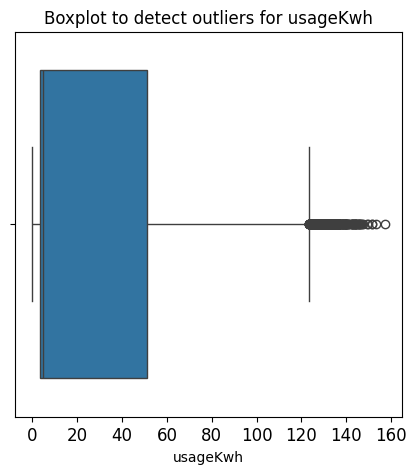

In [9]:
plt.figure(figsize=(5,5))
plt.title('Boxplot to detect outliers for usageKwh', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['usageKwh'])
plt.show();

The boxplot above shows that there are outliers in `usageKwh` variable.

It would be helpful to investigate how many rows in the data contain outliers in the `usageKwh` column.

In [10]:
# Compute the 25th percentile value in `usageKwh`
percentile25 = df['usageKwh'].quantile(0.25)

# Compute the 75th percentile value in `usageKwh`
percentile75 = df['usageKwh'].quantile(0.75)

# Compute the interquartile range in `usageKwh`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `usageKwh`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `usageKwh`
outliers = df[(df['usageKwh'] > upper_limit) | (df['usageKwh'] < lower_limit)]

# Count how many rows in the data contain outliers in `usageKwh`
print("Number of rows in the data containing outliers in `usageKwh`:", len(outliers))

Lower limit: -68.85624999999999
Upper limit: 123.29374999999999
Number of rows in the data containing outliers in `usageKwh`: 328


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove these outliers based on the type of model you decide to use.

## Data Exploration (Continue EDA)
### Data Visualization
Now, start examining the variables that are interested, and create plots to visualize relationships between variables in the data.

could start by creating a stacked boxplot showing Usage_kWh distributions for `co2Emissions`, comparing the distributions of the amount of electricity consumed versus The amount of carbon dioxide emissions produced during energy consumption.

Box plots are very useful in visualizing distributions within data, but they can be deceiving without the context of how big the sample sizes that they represent are. So, you could also plot a stacked histogram to visualize the distribution of `co2Emissions` for load category that shows the level of energy consumption at that time, such as `Light_Load`. This can help in understanding energy consumption patterns in the company.

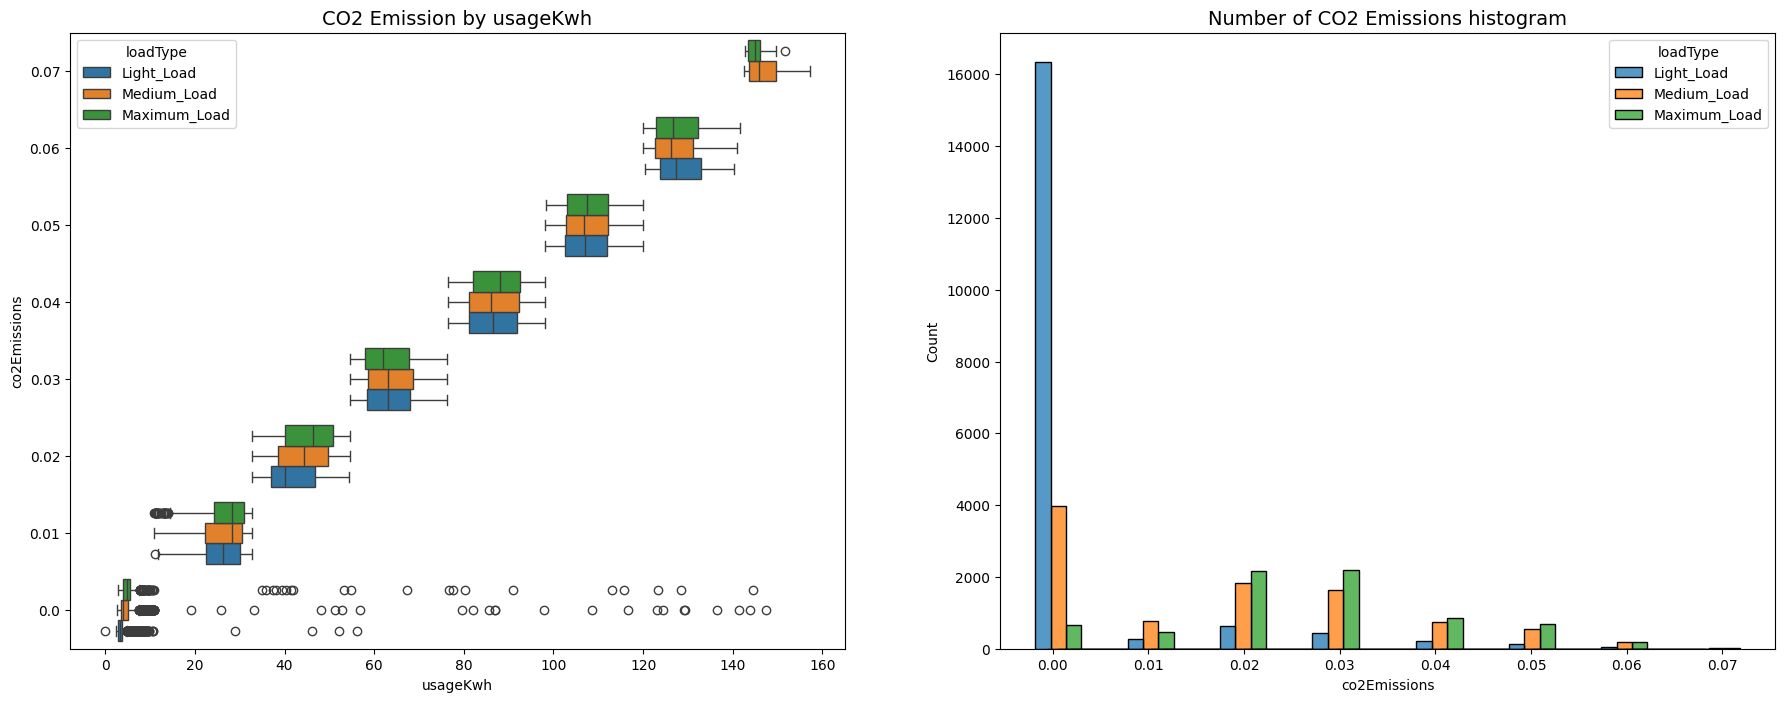

In [11]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Create boxplot showing `Usage_kWh` distributions for `Load_Type`, comparing energy consumptions
sns.boxplot(data=df, x='usageKwh', y='co2Emissions', hue='loadType', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('CO2 Emission by usageKwh', fontsize='14')

# Create histogram showing distribution of `co2Emissions`, comparing Load_Type
sns.histplot(data=df, x='co2Emissions', hue='loadType', multiple='dodge', shrink=4, ax=ax[1])
ax[1].set_title('Number of CO2 Emissions histogram', fontsize='14')

# Display the plots
plt.show()

1.  Higher electricity usage tends to result in higher CO₂ emissions (ppm) across all load categories. This indicates that energy-intensive consumption correlates with higher CO₂ concentration in the environment or in system outputs.

2.  Maximum Load generally produces slightly higher CO₂ emissions at the same consumption levels compared to Light Load and Medium Load. This suggests that under heavy load conditions, the system might operate less efficiently, leading to higher emissions per kWh.

3.  As electricity usage increases, the spread of CO₂ emissions also widens, with a larger interquartile range (IQR). This indicates greater variability in emissions, possibly due to operational inefficiencies or varying energy sources used at higher consumption levels. Outliers appear mostly in low to medium electricity usage, suggesting there are specific conditions or cases where emissions do not align with typical patterns (e.g., maintenance issues, differences in energy sources, or operational anomalies).

C:\Users\rflip\AppData\Local\Temp\ipykernel_18948\3754814118.py:11: UserWarning: Mismatched number of handles and labels: len(handles) = 5 len(labels) = 4
  plt.legend(handles=handles, labels=labels)


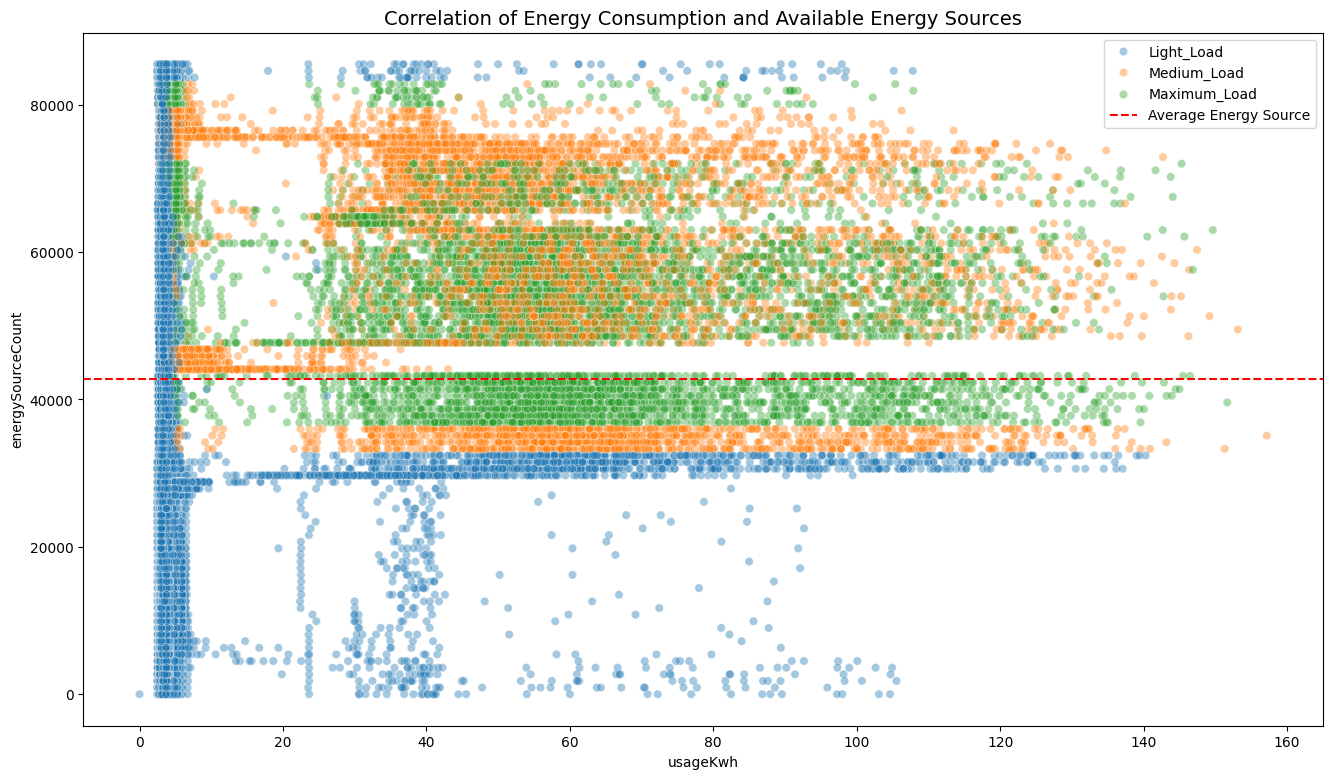

In [12]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='usageKwh', y='energySourceCount', hue='loadType', alpha=0.4)

# Add a dashed horizontal line at y = 42750.0
plt.axhline(y=42750.0, color='red', label='Average Energy Source', ls='--')

# Create a custom legend entry for the dashed line
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='red', lw=2, ls='--'))

plt.legend(handles=handles, labels=labels)
plt.title('Correlation of Energy Consumption and Available Energy Sources', fontsize='14')
plt.show();


The Light Load category has an average energy consumption below `42,750` units, represented by the horizontal red dashed line indicating the overall average energy usage. This suggests that Light Load consumption consistently remains below the general usage trend, which may imply more efficient or limited use within this category.

On the other hand, both the Medium Load and Maximum Load categories show energy consumption that averages above this overall threshold, indicating higher energy demands. This pattern highlights that these categories frequently consume more energy, possibly due to increased operational needs or larger-scale activities.

This visualization gives a clear understanding of how different load levels interact with energy resources, showing a natural division where Light Load tends to stay under the average, while Medium and Maximum Loads operate above it.

In [13]:
# Calculate mean and median usageKwh scores of usage who light, medium and maximum 
df.groupby(['loadType'])['usageKwh'].agg(['mean','median'])

,mean,median
loadType,,
Light_Load,8.626207,3.310
Maximum_Load,59.265314,56.630
Medium_Load,38.445394,34.435



As expected, the data reveals a clear trend: the higher the load type, the greater the energy consumption.

- Light Load has the lowest average energy usage, with a mean of approximately 8.63 kWh and a median of 3.31 kWh. This suggests that light load activities require significantly less power.
- Medium Load shows an increase in energy demand, with a mean usage of around 38.45 kWh and a median of 34.44 kWh.
- Maximum Load exhibits the highest energy consumption, with a mean of 59.27 kWh and a median of 56.63 kWh, reflecting the substantial power needed for these activities.

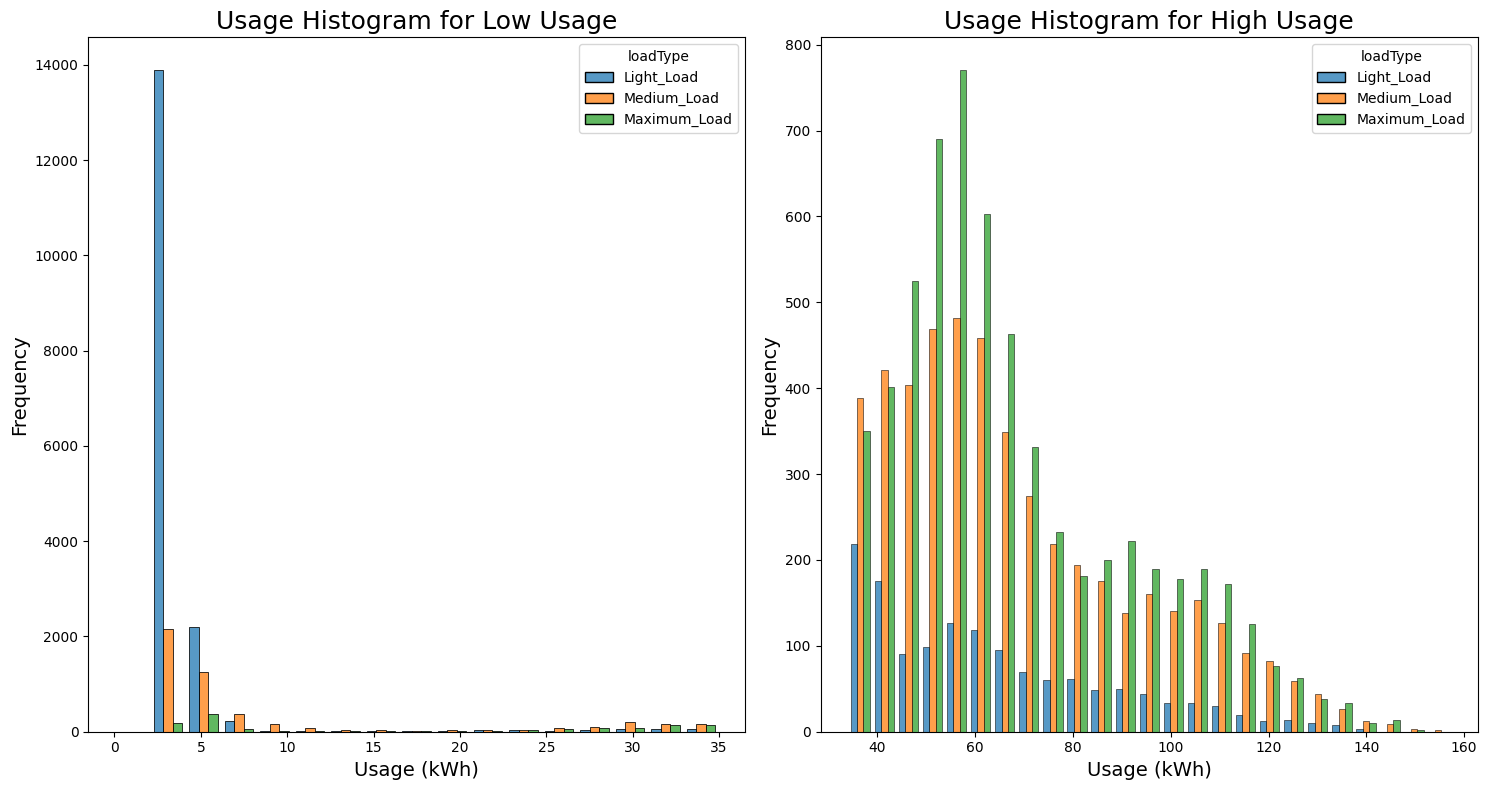

In [14]:
# Set figure and axes with a more standard size
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Define low and high usage
low_usage = df[df['usageKwh'] < 35]
high_usage = df[df['usageKwh'] > 34]

# Plot low usage histogram with reduced binwidth
sns.histplot(data=low_usage, x='usageKwh', hue='loadType', binwidth=2,
             hue_order=['Light_Load', 'Medium_Load', 'Maximum_Load'], multiple='dodge', shrink=0.8, ax=ax[0])
ax[0].set_title('Usage Histogram for Low Usage', fontsize=18)
ax[0].set_xlabel('Usage (kWh)', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)

# Plot high usage histogram with reduced binwidth
sns.histplot(data=high_usage, x='usageKwh', hue='loadType', binwidth=5,
             hue_order=['Light_Load', 'Medium_Load', 'Maximum_Load'], multiple='dodge', shrink=0.8, ax=ax[1])
ax[1].set_title('Usage Histogram for High Usage', fontsize=18)
ax[1].set_xlabel('Usage (kWh)', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

For low energy usage (below 35 kWh), `Light_Load` is predominant, indicating minimal energy consumption aligns with lighter loads. High energy usage (above 34 kWh) shifts toward `Maximum_Load` and `Medium_Load`, showing that higher loads are more common with increased consumption. This highlights a clear relationship: lighter loads favor lower usage while maximum loads align with higher demand.

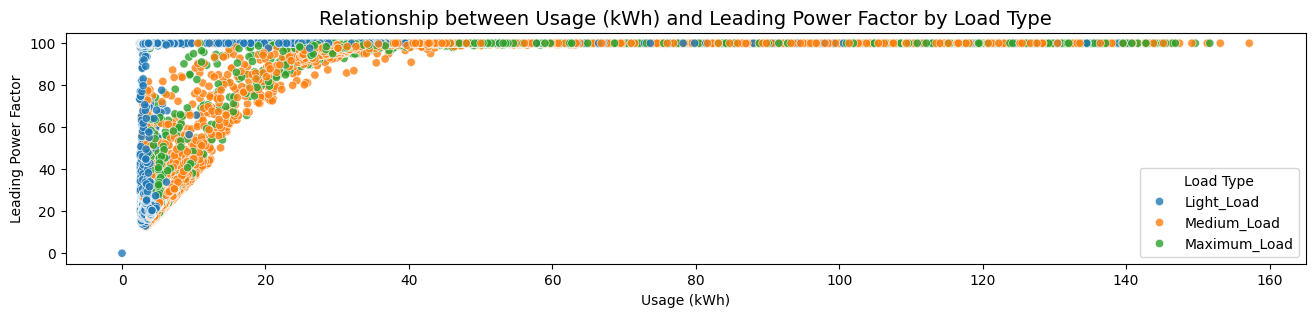

In [15]:
# Create plot to examine relationship between `usageKwh` and `leadingPowerFactor`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='usageKwh', y='leadingPowerFactor', hue='loadType', alpha=0.8)

# Adjust legend and title to match the variables in your data
plt.legend(title='Load Type')
plt.title('Relationship between Usage (kWh) and Leading Power Factor by Load Type', fontsize=14)
plt.xlabel('Usage (kWh)')
plt.ylabel('Leading Power Factor')

plt.show()

- At low usage levels (below ~10 kWh), there’s a noticeable spread in the power factor values, especially for Light_Load. This suggests that the efficiency in reactive power usage varies widely at low energy consumption levels.

- As usage increases, the power factor approaches the maximum (100%), indicating improved efficiency in the energy usage. Higher usage generally correlates with a high leading power factor across all load types, suggesting minimal reactive power loss at higher loads

Next, inspect how the load energy types distributed.



In [16]:
# Display counts for each load types
df["loadType"].value_counts()

loadType
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

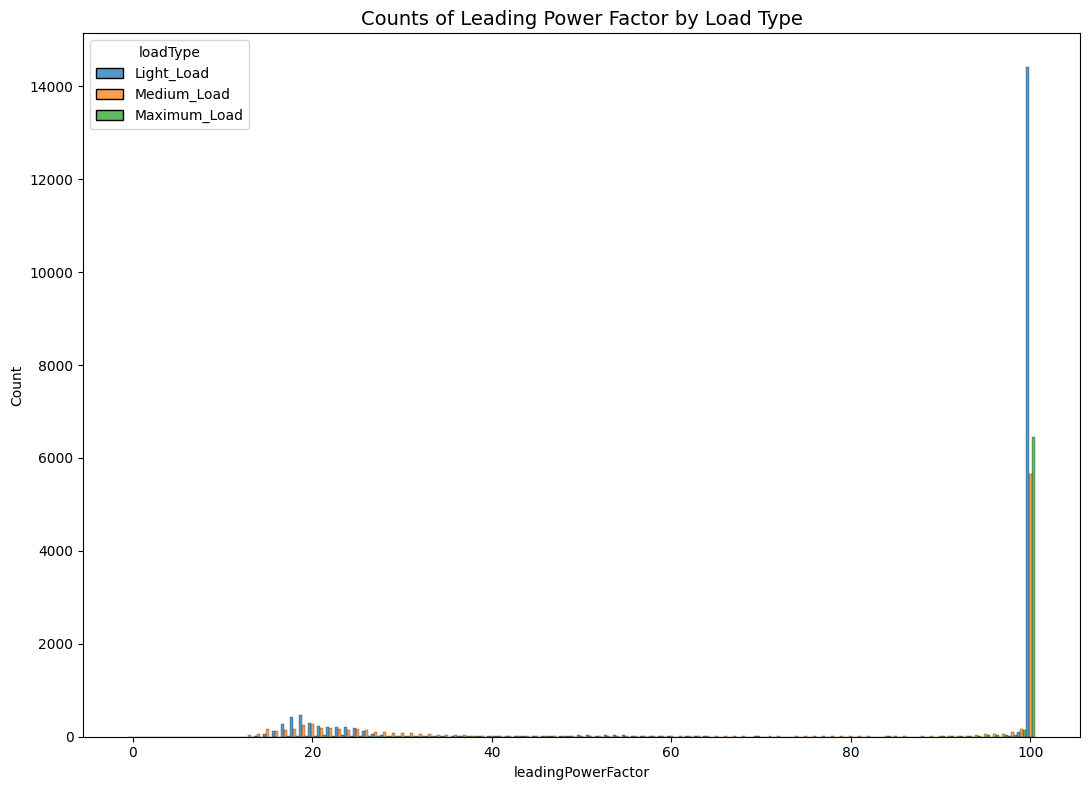

In [17]:
plt.figure(figsize=(11, 8))

# Create the histogram with a proper hue variable
sns.histplot(data=df, x='leadingPowerFactor', hue='loadType', discrete=True,
             multiple='dodge', shrink=1, hue_order=['Light_Load', 'Medium_Load', 'Maximum_Load'])  # Ensure status labels are correct

plt.xticks(rotation='horizontal')
plt.title('Counts of Leading Power Factor by Load Type', fontsize=14)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Check for strong correlations between variables in the data.

With lower energy usage and higher efficiency, the light load type demonstrates that systems can operate more optimally, minimizing energy waste and enhancing overall performance. This becomes important in efforts to improve energy efficiency and reduce operational costs.

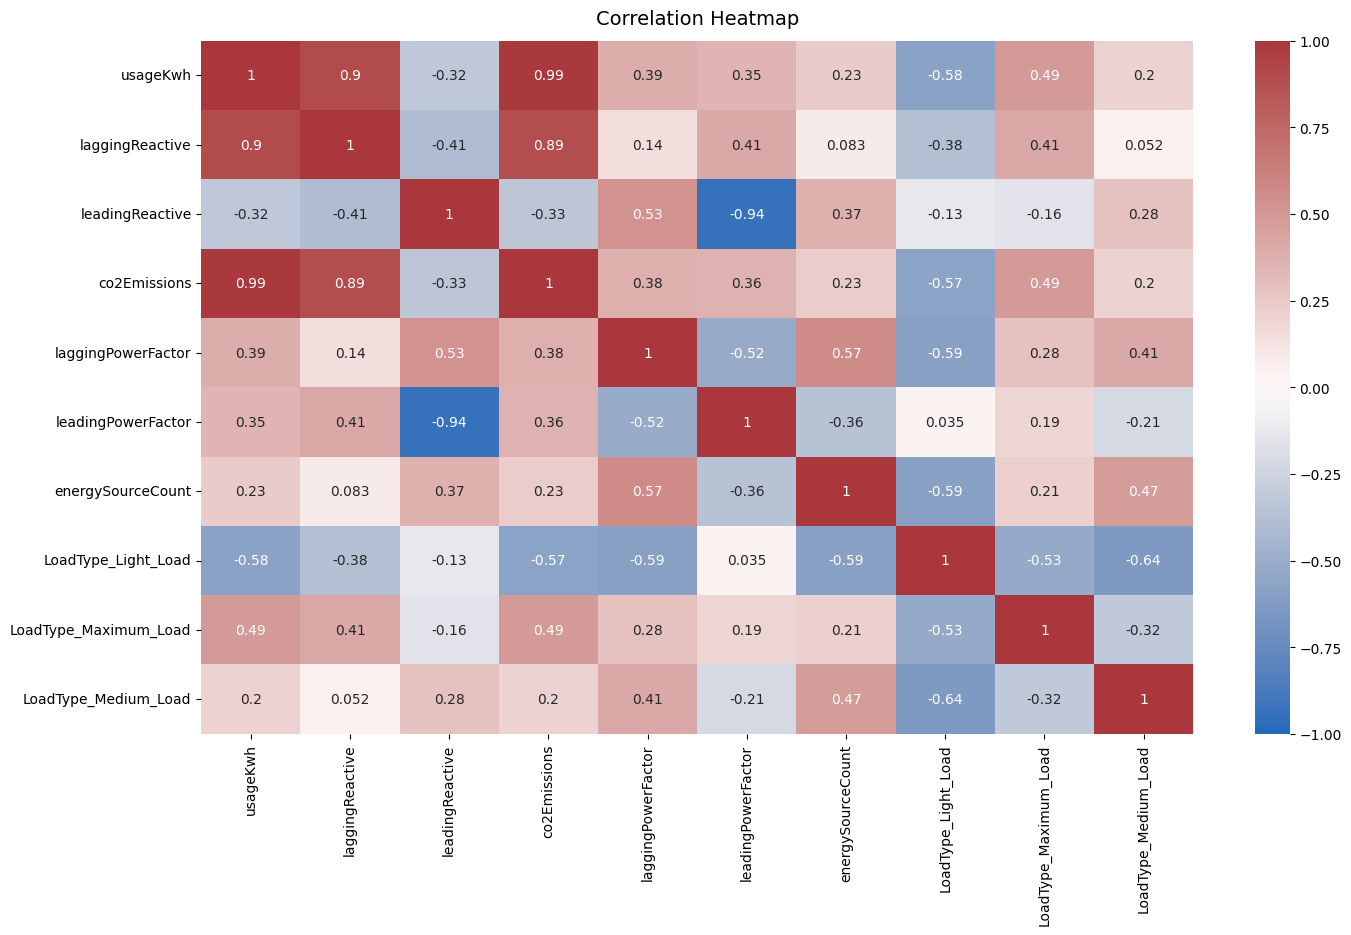

In [18]:
df0 = pd.DataFrame(df)

# One-hot encode the 'LoadType' column
df_loadtype_encoded = pd.get_dummies(df0['loadType'], prefix='LoadType')

# Filter numeric columns only
numeric_df = df0.select_dtypes(include=['number'])

# Concatenate the numeric DataFrame with the one-hot encoded 'LoadType' columns
numeric_df = pd.concat([numeric_df, df_loadtype_encoded], axis=1)

# Plotting the correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)
plt.show()

- usageKwh, laggingReactive, and co2Emissions all have a strong positive correlation with each other, indicating that higher energy usage tends to be associated with higher reactive power and CO₂ emissions.
- leadingPowerFactor and leadingReactive show a strong negative correlation, suggesting that higher leading power factor is associated with lower leading reactive power.
- energySourceCount has a moderate positive correlation with laggingPowerFactor, implying that an increase in energy sources is associated with a higher lagging power factor.
- Whether leadingReactive is high is negatively correlated with leadingPowerFactor.
This heatmap highlights how certain energy usage metrics and power factors are interrelated, with strong positive and negative correlations providing insight into the underlying patterns.

### Recall model assumptions
**Logistic Regression model assumptions**
- Outcome variable is categorical
-Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

### Identify the type of prediction task.
the goal is to predict whether an energy consumptions is efficient, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating efficient) or 0 (indicating not efficient).

### Identify the type of models most appropriate for this task.
Since the variable you want to predict (whether the energy consumption not efficient) is categorical, you could either build a Logistic Regression model, or a Tree-based Machine Learning model.

So you could proceed with one of the two following approaches. Or, if you'd like, you could implement both and determine how they compare.

**Logistic Regression**

Note that binomial logistic regression suits the task because it involves binary classification.

Start by one-hot encoding the categorical variables as needed.

In [22]:
# One-hot encode the categorical variables as needed and save resulting dataframe in a new variable
df_enc = pd.get_dummies(df0, prefix=['leadingPowerFactor_category'], columns = ['leadingPowerFactor_category'], drop_first=False)

# Display the new dataframe
df_enc.head()

,date,usageKwh,laggingReactive,leadingReactive,co2Emissions,laggingPowerFactor,leadingPowerFactor,energySourceCount,weeklyStatus,dayOfWeek,loadType,leadingPowerFactor_category_Low,leadingPowerFactor_category_Max,leadingPowerFactor_category_Medium
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,False,True,False
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,False,True,False
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,False,True,False
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,False,True,False
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,False,True,False


Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.



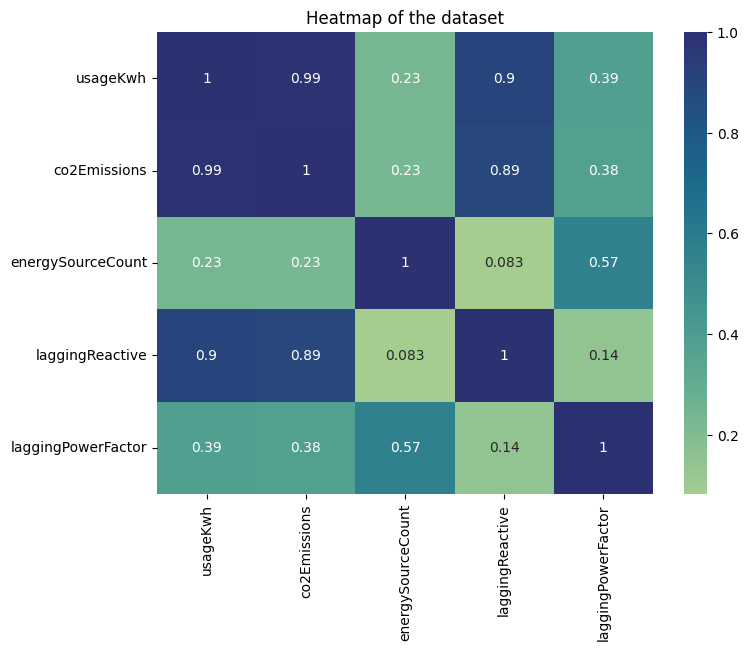

In [23]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['usageKwh', 'co2Emissions', 'energySourceCount', 'laggingReactive', 'laggingPowerFactor']].corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Create a stacked bart plot to visualize number of Co2 Emissions across load type, comparing those effiecient with those not.



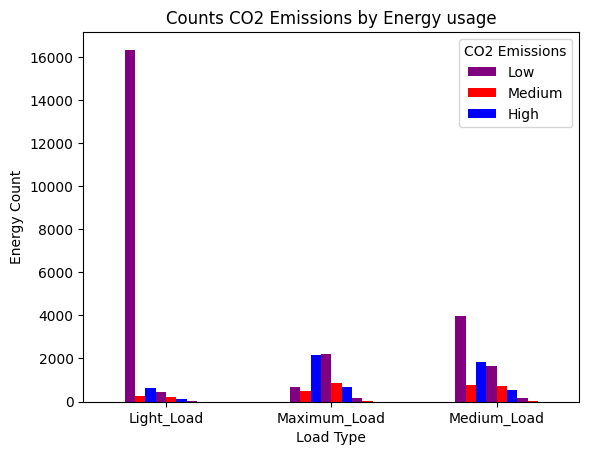

In [51]:
# Creating a stacked bar plot
pd.crosstab(df0["loadType"], df0["co2Emissions"]).plot(kind='bar', stacked=False, color=['purple', 'red', 'blue'])

# Adding title and labels
plt.title('Counts CO2 Emissions by Energy usage')
plt.ylabel('Energy Count')
plt.xlabel('Load Type')
plt.xticks(rotation=0)

# Adding legend for the co2Emissions column
plt.legend(title='CO2 Emissions', labels=['Low', 'Medium', 'High'])
plt.show()

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the usageKwh column that were identified earlier.

In [60]:
# Step 1: Create the loadType_numeric column in df
df_enc['loadType_numeric'] = df_enc['loadType'].apply(lambda x: 0 if x == 'Light_Load' else 1)

# Step 2: Select rows without outliers in usageKwh and save to a new variable df_logreg
df_logreg = df_enc[(df_enc['usageKwh'] >= lower_limit) & (df_enc['usageKwh'] <= upper_limit)]

# Step 3: Display the first few rows of df_logreg to confirm loadType_numeric is included
df_logreg.head()

,date,usageKwh,laggingReactive,leadingReactive,co2Emissions,laggingPowerFactor,leadingPowerFactor,energySourceCount,weeklyStatus,dayOfWeek,loadType,leadingPowerFactor_category_Low,leadingPowerFactor_category_Max,leadingPowerFactor_category_Medium,loadType_numeric
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,False,True,False,0
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,False,True,False,0
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,False,True,False,0
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,False,True,False,0
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,False,True,False,0


Isolate the outcome variable, which is the variable you want your model to predict.



In [61]:
# Isolate the outcome variable
y = df_logreg['loadType_numeric']

# Display first few rows of the outcome variable
y.head() 

0    0
1    0
2    0
3    0
4    0
Name: loadType_numeric, dtype: int64

Select the features want to use in the model. Consider which variables will help to predict the outcome variable, `loadType_numeric`.



In [67]:
# Convert True/False to 1/0 in the specified columns using .loc to avoid SettingWithCopyWarning
df_logreg.loc[:, ['leadingPowerFactor_category_Low', 'leadingPowerFactor_category_Max', 'leadingPowerFactor_category_Medium']] = \
    df_logreg[['leadingPowerFactor_category_Low', 'leadingPowerFactor_category_Max', 'leadingPowerFactor_category_Medium']].astype(int)

In [78]:
# Select the features you want to use in your model
X = df_logreg[['usageKwh', 'laggingReactive', 'leadingReactive', 'co2Emissions', 'laggingPowerFactor', 'energySourceCount', 'leadingPowerFactor_category_Low', 'leadingPowerFactor_category_Max', 'leadingPowerFactor_category_Medium' , 'loadType_numeric']]

# Display the first few rows of the selected features 
X.head()

,usageKwh,laggingReactive,leadingReactive,co2Emissions,laggingPowerFactor,energySourceCount,leadingPowerFactor_category_Low,leadingPowerFactor_category_Max,leadingPowerFactor_category_Medium,loadType_numeric
0,3.17,2.95,0.0,0.0,73.21,900,0,1,0,0
1,4.00,4.46,0.0,0.0,66.77,1800,0,1,0,0
2,3.24,3.28,0.0,0.0,70.28,2700,0,1,0,0
3,3.31,3.56,0.0,0.0,68.09,3600,0,1,0,0
4,3.82,4.50,0.0,0.0,64.72,4500,0,1,0,0


Split the data into training set and testing set.



In [82]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Construct a logistic regression model and fit it to the training dataset.



In [93]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

Test the logistic regression model: use the model to make predictions on the test set.

In [94]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model.

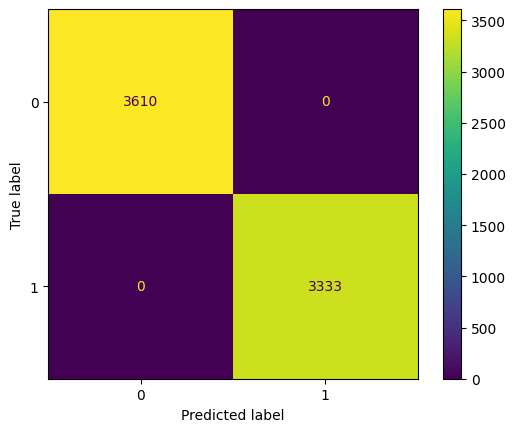

In [95]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

Check the class balance in the data. In other words, check the value counts in the `loadType` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [96]:
df_logreg['loadType_numeric'].value_counts(normalize=True)


loadType_numeric
0    0.519676
1    0.480324
Name: proportion, dtype: float64

In [97]:
# Create classification report for logistic regression model
target_names = ['Predicted is energy efficient', 'Predicted is energy not efficient']
print(classification_report(y_test, y_pred, target_names=target_names))

                                   precision    recall  f1-score   support

    Predicted is energy efficient       1.00      1.00      1.00      3610
Predicted is energy not efficient       1.00      1.00      1.00      3333

                         accuracy                           1.00      6943
                        macro avg       1.00      1.00      1.00      6943
                     weighted avg       1.00      1.00      1.00      6943

